In [ ]:
!pip install wand

     |████████████████████████████████| 139 kB 5.2 MB/s 


In [ ]:
!apt install imagemagick

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  fonts-droid-fallback fonts-noto-mono ghostscript gsfonts
  imagemagick-6-common imagemagick-6.q16 libcupsfilters1 libcupsimage2
  libdjvulibre-text libdjvulibre21 libgs9 libgs9-common libijs-0.35
  libjbig2dec0 liblqr-1-0 libmagickcore-6.q16-3 libmagickcore-6.q16-3-extra
  libmagickwand-6.q16-3 libnetpbm10 libwmf0.2-7 netpbm poppler-data
Suggested packages:
  fonts-noto ghostscript-x imagemagick-doc autotrace cups-bsd | lpr | lprng
  enscript gimp gnuplot grads hp2xx html2ps libwmf-bin mplayer povray radiance
  sane-utils texlive-base-bin transfig ufraw-batch inkscape libjxr-tools
  libwmf0.2-7-gtk poppler-utils fonts-japanese-mincho | fonts-ipafont-mincho
  fonts-japanese-gothic | fonts-ipafont-gothic fonts-arphic-ukai
  fonts-arphic-uming fonts-nanum
The following NEW packages will be installed:
  fonts-droid-fallback fonts-noto-mono g

#sharpen image using imagemagick

In [ ]:
from wand.image import Image

with Image(filename="/content/Photo 3121.jpg") as img:
#with Image(filename="/content/image repair 12 (1).png") as img:
    img.sharpen(radius=8, sigma=4)
    img.save(filename="effect-sharpen4.jpg")

#Sauvola binarization

In [6]:
image_path = "/content/Photo 3121.jpg"

image_path = cv2.imread(image_path, 0)
#alpha = 1.5 # Contrast control (1.0-3.0)
#beta = 0 # Brightness control (0-100)
#image_path = cv2.convertScaleAbs(image_path, alpha=alpha, beta=beta)
window_size = 25
#img = cv2.imread(image_path, 0)
thresh_sauvola = threshold_sauvola(image_path, window_size = window_size)
binary_sauvola = image_path > thresh_sauvola

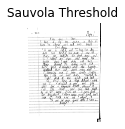

In [7]:
import matplotlib
import matplotlib.pyplot as plt
plt.subplot(2, 2, 4)
plt.imshow(binary_sauvola, cmap=plt.cm.gray)
plt.title('Sauvola Threshold')
plt.axis('off')

plt.show()

In [8]:
plt.imsave("onePic.jpg", binary_sauvola,cmap=plt.cm.gray)

In [9]:
originalImage= cv2.imread('/content/preprocesssav.jpg')

#gray image

In [11]:
grayImage = cv2.cvtColor(originalImage, cv2.COLOR_BGR2GRAY)

In [ ]:
from google.colab.patches import cv2_imshow


In [3]:
cv2_imshow(grayImage)

In [2]:
sav_image = cv2.imread('onePic.jpg')

#Binary threshhold

In [1]:
(thresh, blackAndWhiteImage) = cv2.threshold(grayImage, 127, 255, cv2.THRESH_BINARY)
 
cv2_imshow(blackAndWhiteImage)

In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
import cv2 as cv
import numpy as np
from PIL import Image
img =cv.imread('image.jpg')
#image scaling
im = Image.open("test.png")
im.save("test-300.png", dpi=(300,300))

#image increase contrast/brightness
alpha = 1.5 # Contrast control (1.0-3.0)
beta = 0 # Brightness control (0-100)
adjusted = cv.convertScaleAbs(img, alpha=alpha, beta=beta)

#binarising the image
im_gray = cv.imread('image.png', cv.IMREAD_GRAYSCALE)
(thresh, im_bw) = cv.threshold(img, 128, 255, cv.THRESH_BINARY | cv.THRESH_OTSU)
im_bw = cv.threshold(im_gray, thresh, 255, cv.THRESH_BINARY)[1]

#image noise removal
im_nr = cv.fastNlMeansDenoisingColored(img, None, 10, 10, 7, 15)

#skew correction
def deskew(image):
  coords = np.column_stack(np.where(image > 0))
  angle = cv.minAreaRect(coords)[-1]
  if angle < -45:
    angle = -(90 + angle)
  else:
    angle = -angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv.warpAffine(image, M, (w, h), flags=cv.INTER_CUBIC, borderMode=cv.BORDER_REPLICATE)
  return rotated
img_ds=deskew(img)